In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf

plt.style.use('ggplot')

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/rotemliani/data_analytics-project_2022/main/Google-Playstore.csv")
df

,App Name,Category,Rating,Rating Count,Installs,Maximum Installs,Price,Size,Released,Content Rating,Ad Supported,In App Purchases
0,Gakondo,Adventure,0.0,0.0,10.0,15,0.00,10M,"Feb 26, 2020",Everyone,False,False
1,Ampere Battery Info,Tools,4.4,64.0,5000.0,7662,0.00,2.9M,"May 21, 2020",Everyone,True,False
2,Vibook,Productivity,0.0,0.0,50.0,58,0.00,3.7M,"Aug 9, 2019",Everyone,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10.0,19,0.00,1.8M,"Sep 10, 2018",Everyone,True,False
4,GROW.me,Tools,0.0,0.0,100.0,478,0.00,6.2M,"Feb 21, 2020",Everyone,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,MAFAB - Filmek adatbÃ¡zisa,Entertainment,3.4,61.0,5000.0,9851,0.00,1.1M,"Aug 17, 2015",Everyone,True,False
1048571,Tweecha ThemeP:TheRollingPchan,Social,0.0,0.0,10.0,15,1.49,1.9M,"Nov 12, 2013",Teen,False,False
1048572,Space Survival,Arcade,4.4,47.0,10000.0,22742,0.00,28M,"Dec 19, 2018",Everyone,True,True
1048573,Qarib Shop Owner,Food & Drink,0.0,0.0,5.0,9,0.00,21M,"Jan 8, 2020",Everyone,False,False


In [5]:
df_free = df.loc[df.Price == 0.00].copy()
df_paid = df.loc[df.Price > 0 ].copy()

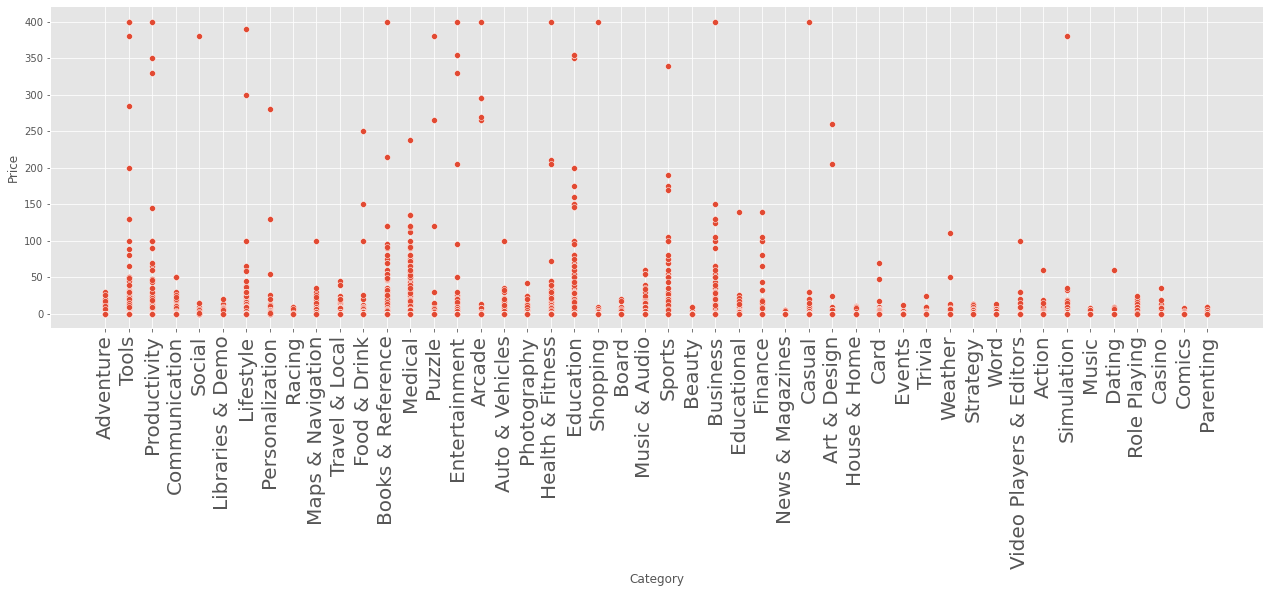

In [6]:
 x=sns.relplot(data=df, x='Category', y='Price', kind='scatter',
            height=5, aspect=3.5)
x.set_xticklabels ( rotation=90, fontsize=20)

In [7]:
df['Released'] = pd.to_datetime(df['Released'], errors='coerce')
df["Year"]= df["Released"].dt.year
df_free['Released'] = pd.to_datetime(df_free['Released'], errors='coerce')
df_free["Year"]= df_free["Released"].dt.year
df_paid['Released'] = pd.to_datetime(df_paid['Released'], errors='coerce')
df_paid["Year"]= df_paid["Released"].dt.year

In [8]:
df_free["Size"] = df_free["Size"].str.replace(r'\D',"")
df_paid["Size"] = df_paid["Size"].str.replace('M',"")

<ipython-input-8-05658104a2b2>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



<AxesSubplot:xlabel='Year'>

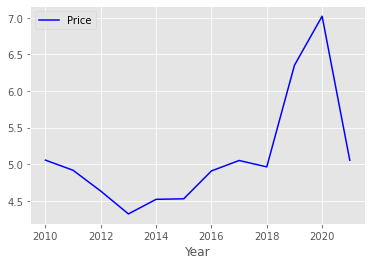

In [9]:
gg = df_paid.groupby("Year",as_index = False)["Price"].mean()
gg.plot(x="Year",y="Price",color="Blue")

<AxesSubplot:xlabel='Year'>

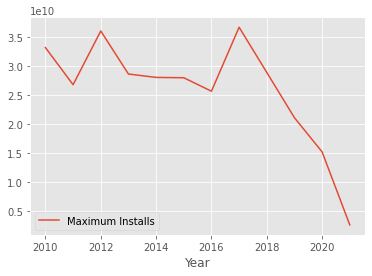

In [10]:
glhf = df.groupby("Year",as_index=False)["Maximum Installs"].sum()
glhf.plot(x="Year",y="Maximum Installs")

In [ ]:
df_paid[["Rating","Rating Count","Maximum Installs","Year","Size"]].corr(method="spearman")

In [ ]:
df_free[["Rating","Rating Count","Maximum Installs","Year","Size"]].corr(method="spearman")

In [12]:
missing_values = df.isnull().sum() 
missing_values

App Name                1
Category                0
Rating              10310
Rating Count        10310
Installs               46
Maximum Installs        0
Price                   0
Size                   92
Released            32033
Content Rating          0
Ad Supported            0
In App Purchases        0
Year                32033
dtype: int64

In [13]:
df.columns = df.columns.str.replace(' ', '_') 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   App_Name          1048574 non-null  object        
 1   Category          1048575 non-null  object        
 2   Rating            1038265 non-null  float64       
 3   Rating_Count      1038265 non-null  float64       
 4   Installs          1048529 non-null  float64       
 5   Maximum_Installs  1048575 non-null  int64         
 6   Price             1048575 non-null  float64       
 7   Size              1048483 non-null  object        
 8   Released          1016542 non-null  datetime64[ns]
 9   Content_Rating    1048575 non-null  object        
 10  Ad_Supported      1048575 non-null  bool          
 11  In_App_Purchases  1048575 non-null  bool          
 12  Year              1016542 non-null  float64       
dtypes: bool(2), datetime64[ns](1), float64(5),

In [15]:
df["Size"] = df["Size"].str.replace("M","",regex = False) 
df["Size"] = df["Size"].str.replace("K","",regex = False) 

In [16]:
df = df.dropna(axis=0)

- rotem פתיח

הצגה

- שחרלאורך השנים אם יש מגמת עלייה או ירידה ואם יש נקודות משמעותיות

סידור דאטה - adir

- 

missing_values = df.isnull().sum()
missing_values

# check i fmissing values is importentעמודה חדשה חינם ותשלום מספר אפליקציות

 - בדיקת קטגוריות - האם יש יותר אפליקציות בתשלום מקטגוריה מיסויימת או קטגוריות פופולריות (מה מורידים יותר)
   (רון) האם ניתן להצביע על קטגוריה שמורידים ממנה יותר בחינם ובתשלום לא האם יש קשר בין כמות האלפיקציות בחנות לבין כמות ההורדות 

בדיקה אם לאורך השנים המחיר עלה או ירד לפי קטגוריה מסויימת והאם יש שינוי בכמות ההוצאות של האפליקציות בחינם או בתשלום 

גרף שמראה קטגוריות מתחלפות שאפשר ללחוץ ולראות איזה קטגוריה הורידו בתקופות זמן שונות




כניסת אפליקציות חדשה לחנות

להראות אולי את הקשר בין כמות הביקורות להאם האפליקציה בחינם או לא ולהסיק שכאשר אנשים משלמים או לא משלמים על התוכן האם אכפת להם יותר להעביר ביקורת על אותה האפליקציה כאשר היא בחינם או בכסף . 